## Example 1

In [1]:
from math import ceil
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy as np

In [2]:
def shiftarg_lon(lon):
    "If lon is outside +/-180, then correct back."
    if(lon>180):
        return ((lon + 180.0) % 360.0)-180.0
    else:
        return lon

def triangulate(i0,i1,i2):
    "Prepare data structures for tri.Triangulate."
    print('triangulating...')
    # i0,i1,i2,ic = ps.to_vertices(indices)
    i0lat,i0lon = ps.to_latlon(i0)
    i1lat,i1lon = ps.to_latlon(i1)
    i2lat,i2lon = ps.to_latlon(i2)
    lats    = np.zeros([3*len(i0lat)],dtype=np.double)
    lons    = np.zeros([3*len(i0lat)],dtype=np.double)
    intmat  = []
    k=0
    for i in range(len(i0)):
        lats[k]   = i0lat[i]
        lons[k]   = i0lon[i]
        lats[k+1] = i1lat[i]
        lons[k+1] = i1lon[i]
        lats[k+2] = i2lat[i]
        lons[k+2] = i2lon[i]
        intmat.append([k,k+1,k+2])
        k=k+3
    for i in range(len(lons)):
        lons[i] = shiftarg_lon(lons[i])
        print('triangulating done.')      
    return lons,lats,intmat

def triangulate1(lats,lons):
    "Prepare data for tri.Triangulate."
    print('triangulating1...')
    intmat=[]
    npts=int(len(lats)/3)
    k=0
    for i in range(npts):
        intmat.append([k,k+1,k+2])
        k=k+3
    for i in range(len(lons)):
        lons[i] = shiftarg_lon(lons[i])
    print('triangulating1 done.')      
    return lons,lats,intmat


lat     len:  3
indices len:  3
indices:      ['0x3d7e69d09dbc425b', '0x4f787e76173d57b', '0x3601d08443fdaf7b']
triangulating...
triangulating done.
triangulating done.
triangulating done.
test1 intmat len:  1
test1       lats:  [ 1.75738915e-07 -1.15917097e-07  6.00000003e+01]
test1       lons:  [ 0.         60.00000009 30.00000003]
test1       intm:  [[0, 1, 2]]
0 hull len:       80
lath,lathc:  240 80
triangulating1...
triangulating1 done.
0 hull len:       80
0 hull lats len:  240
0 hull lats1:     18 [58.60028538 65.58484188 59.74568674]
0 hull lons1:     18 [28.67505114 22.7923471  17.91494647]

resolution:     4
hull len:     80
hull ll len:  240
hull im len:  80


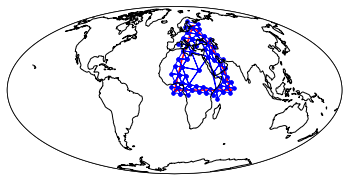

In [3]:
# Make a triangle's lat & lon corners
# lat = np.array([0, 0,60], dtype=np.double)
# lon = np.array([0,60,30], dtype=np.double)
lat = np.array([0, 0,60], dtype=np.double)
lon = np.array([0,60,30], dtype=np.double)

# Make the indices out of the corners
s_resolution = 27
indices = ps.from_latlon(lat, lon, s_resolution)
print('lat     len: ',len(lat))
print('indices len: ',len(indices))
print('indices:     ',[hex(i) for i in indices])

# Prepare to triangulate the indices (as locations)
def test1(indices):
    "Plot the outline of a triangle using first three indices."
    i0 = np.array([indices[0]], dtype=np.int64)
    i1 = np.array([indices[1]], dtype=np.int64)
    i2 = np.array([indices[2]], dtype=np.int64)
    lons,lats,intmat = triangulate(i0,i1,i2)
    print('test1 intmat len: ',len(intmat))
    print('test1       lats: ',lats)
    print('test1       lons: ',lons)
    print('test1       intm: ',intmat)
    return lons,lats,intmat
    # triang = tri.Triangulation(lons,lats,intmat)
    # print('test1 triang    : ',triang)
    # return triang

# Set up the projection and transformation
# proj = ccrs.PlateCarree()
# proj = ccrs.Robinson()
# proj = ccrs.Geodetic()
# proj = ccrs.Geodesic()
proj   = ccrs.Mollweide()
transf = ccrs.Geodetic()
# transf = ccrs.PlateCarree()

plt.figure()
plt.subplot(projection=proj,transform=transf)
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax = plt.axes(projection=ccrs.Mollweide())
# proj=ccrs.Mollweide()
ax = plt.axes(projection=proj,transform=transf)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-90,90)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
ax.coastlines()
# plt.contourf(xg,yg,v0g,60,transform=ccrs.PlateCarree())
# plt.scatter(xg_flat,yg_flat,s=300,c=v_flat)
# plt.triplot(triang,'ko-')
# plt.show()
  
def plot1(triang):
  # plt.triplot(triang,'ro-',transform=ccrs.Geodetic())
  plt.triplot(triang,'r-',transform=transf)
  # plt.show()
  return

test1_lons,test1_lats,test1_intmat = test1(indices)
plot1(tri.Triangulation(test1_lons,test1_lats,test1_intmat))
plt.scatter(test1_lons,test1_lats,s=5,c='r',transform=ccrs.PlateCarree())  

# resolution = 2;
resolution = 4;
# resolution = 7;
# hull = ps.to_hull_range(indices,resolution,100)
hull = ps.to_hull_range_from_latlon(lat,lon,resolution)
print('0 hull len:      ',len(hull))

# print(90)
# lats0 = np.zeros(len(hull)*4,dtype=np.int64)
# lons0 = np.zeros(len(hull)*4,dtype=np.int64)
# lats0,lons0 = ps._to_vertices_latlon(hull)
# print('lats0,lons0: ',len(lats0),len(lons0))
# print(100)
lath,lonh,lathc,lonhc = ps.to_vertices_latlon(hull)
print('lath,lathc: ',len(lath),len(lathc))
# print(110)
lons1,lats1,intmat1 = triangulate1(lath,lonh)

## h0,h1,h2,hc = ps.to_vertices(hull)
## lons1,lats1,intmat1 = triangulate(h0,h1,h2)

print('0 hull len:      ',len(hull))
print('0 hull lats len: ',len(lats1))
jtest=18
j=jtest
print('0 hull lats1:    ',j,lats1[j*3:(j+1)*3])
print('0 hull lons1:    ',j,lons1[j*3:(j+1)*3])
j=0
# print('0 hull lats1:    ',[i for i in lats1[j:j+12]])
# print('0 hull lons1:    ',[i for i in lons1[j:j+12]])
print('')

# tid = np.array([0x4c0000000000003],dtype=np.int64)
# t0,t1,t2,tc = ps.to_vertices(tid)
# print('t0: ',hex(t0[0]))
# print('t1: ',hex(t1[0]))
# print('t2: ',hex(t2[0]))
# print('tc: ',hex(tc[0]))
# print('t0 ll : ',ps.to_latlon(t0))
# print('t1 ll : ',ps.to_latlon(t1))
# print('t2 ll : ',ps.to_latlon(t2))
# print('tc ll : ',ps.to_latlon(tc))
# print('')

if False:
    # i=9; ilen=2
    # i=10; ilen=1
    # i=jtest; ilen=4
    i=jtest; ilen=10
    id_test = np.array(hull[i:i+ilen],dtype=np.int64)
    print('i,id  : ',i,[hex(j) for j in id_test])
    i0=i*3; i1=(i+ilen)*3
    lats1   = lats1[i0:i1]
    lons1   = lons1[i0:i1]
    # intmat1 = [intmat1[i]]
    intmat1 = []
    for j in range(ilen):
        intmat1.append([3*j,3*j+1,3*j+2])
    # intmat1 = [[0,2,1]]
    id_test_lats,id_test_lons,id_test_latsc,id_test_lonsc = ps.to_vertices_latlon(id_test)
    lonstest,latstest,intmattest = triangulate1(id_test_lats,id_test_lons)
    # i0test,i1test,i2test,ictest = ps.to_vertices(id_test)
    # print('test id:   ',[hex(i) for i in id_test])
    # print('test ll : ',[(lats1[i],lons1[i]) for i in range(len(lats1))])
    # print('test im : ',[i for i in intmat1])
    # lonstest,latstest,intmattest = triangulate(i0test,i1test,i2test)
    print('test lat:   ',len(latstest))
    print('test lon:   ',len(lonstest))
    print('test im:    ',len(intmattest))
    print('test im[0]: ',intmattest[0])
    print('test im:    ',intmattest)    
    triangtest = tri.Triangulation(lonstest,latstest,intmattest)
    plt.triplot(triangtest,'g-',transform=transf)
    plt.scatter(lonstest,latstest,s=5,c='g',transform=ccrs.PlateCarree())
    # plt.triplot(triangtest,'go-',transform=ccrs.Geodetic())
    # plt.scatter(lonstest,latstest,s=10,c='g',transform=ccrs.Geodetic())

print('resolution:    ',resolution)
# print('hull    :    ',[hex(i) for i in hull])
print('hull len:    ',len(hull))
print('hull ll len: ',len(lons1))
print('hull im len: ',len(intmat1)) 
# print('hull ll : ',[(lats1[i],lons1[i]) for i in range(len(lats1))])
# print('hull im : ',[i for i in intmat1])

triang1 = tri.Triangulation(lons1,lats1,intmat1)
plt.triplot(triang1,'b-',transform=transf,lw=1,markersize=3)
plt.scatter(lons1,lats1,s=10,c='b',transform=ccrs.PlateCarree())
# # plt.contourf(xg,yg,v0g,60,transform=ccrs.PlateCarree())

plt.show()